In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Read the dataset to python environment

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##2. Do the necessary pre-processing steps


###Checking missing values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

###Filling missing values

In [7]:
for i in ['SL','SW','PL']:
  data[i] = data[i].fillna(data[i].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

###Checking ouliers

Text(0.5, 1.0, 'SL')

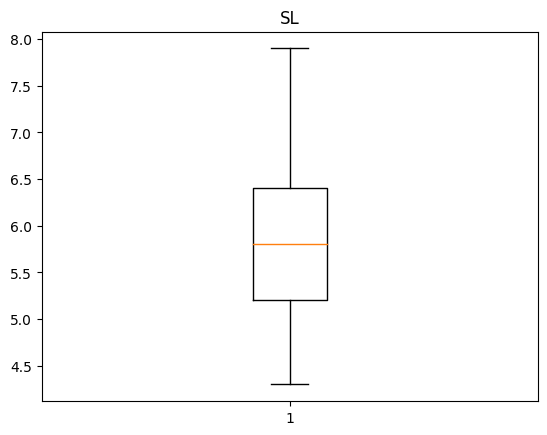

In [10]:
plt.boxplot(data['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

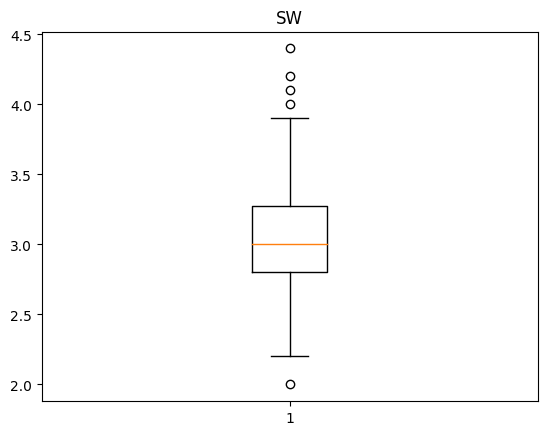

In [11]:
plt.boxplot(data['SW'])
plt.title('SW')

In [12]:
Q1 = np.percentile(data['SW'],25)

In [13]:
Q1

2.8

In [14]:
Q2 = np.percentile(data['SW'],50)

In [15]:
Q2

3.0

In [16]:
Q3 = np.percentile(data['SW'],75)

In [17]:
Q3

3.275

In [18]:
IQR = Q3-Q1

In [19]:
IQR

0.4750000000000001

In [20]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3+1.5*IQR

In [21]:
low_limit

2.0874999999999995

In [22]:
upr_limit

3.9875

In [25]:
outliers=[]
for x in data['SW']:
  if x>upr_limit or x<low_limit:
    outliers.append(x)

In [26]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
ind = data['SW']>upr_limit 
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [29]:
data.drop([14, 15, 32, 33],inplace=True)

In [30]:
ind = data['SW']<low_limit 
data.loc[ind].index

Int64Index([60], dtype='int64')

In [31]:
data.drop([60],inplace=True)

Text(0.5, 1.0, 'SW')

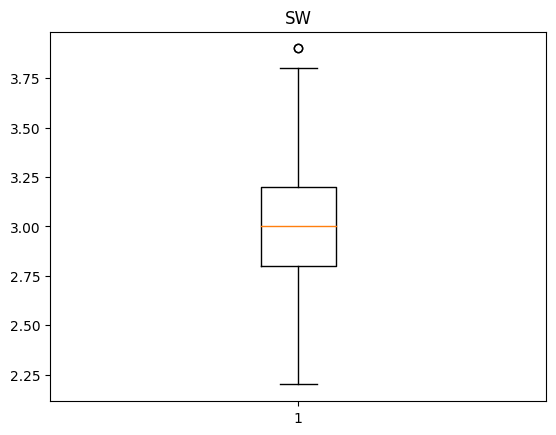

In [32]:
plt.boxplot(data['SW'])
plt.title('SW')

In [33]:
data.shape

(145, 5)

Text(0.5, 1.0, 'PL')

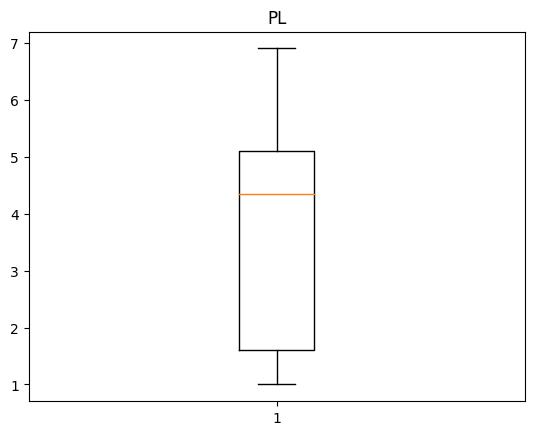

In [35]:
plt.boxplot(data['PL'])
plt.title('PL')

Text(0.5, 1.0, 'PW')

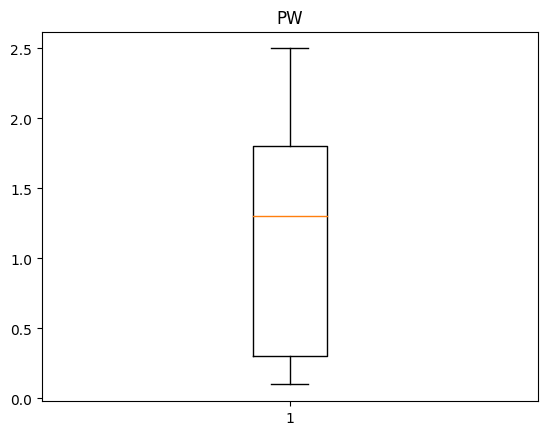

In [36]:
plt.boxplot(data['PW'])
plt.title('PW')

###Encoding the data

In [38]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###Linear Regression

In [39]:
x = data.drop('Classification',axis=1)
y = data['Classification']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr=LinearRegression()
model=lr.fit(x_train, y_train)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
y_pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, y_pred))
print('R squared value is ', r2_score(y_test, y_pred))

MSE is  0.05525365438047677
R squared value is  0.9193258275451719


##3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

###Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

model = log_reg.fit(x_train, y_train)
y_predictions  = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [51]:
print('accuracy is: ',round(accuracy_score(y_test,y_predictions),4))
print('Precision is: ',round(precision_score(y_test,y_predictions,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_predictions,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_predictions,average='micro'),4))

accuracy is:  0.931
Precision is:  0.931
recall score is:  0.931
f1 score is:  0.931


###KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
x = data.drop('Classification',axis=1)
y = data['Classification']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

k_val = np.arange(3,15)
acc_val = []
for k in k_val:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train, y_train)
    pred  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred)
    acc_val.append(acc)

Text(0, 0.5, 'Accuracy')

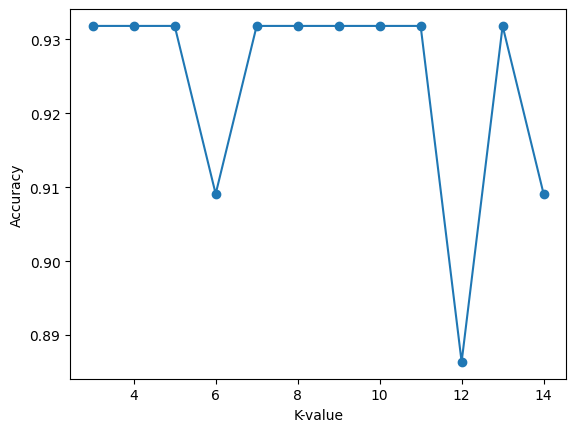

In [65]:
plt.plot(k_val,acc_val,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
pred  = classifier.predict(x_test)
   

print('accuracy is: ',accuracy_score(y_test,pred))
print('Precision is: ',precision_score(y_test,pred,average='micro'))
print('recall score is: ',recall_score(y_test,pred,average='micro'))
print('f1 score is: ',f1_score(y_test,pred,average='micro'))

accuracy is:  0.9318181818181818
Precision is:  0.9318181818181818
recall score is:  0.9318181818181818
f1 score is:  0.9318181818181818


###Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [69]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dt_clf.predict(x_test)

In [71]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.9090909090909091


In [72]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


###SVM

In [74]:
from sklearn.svm import SVC
x = data.drop('Classification',axis=1)
y = data['Classification']

In [75]:
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [76]:
y_pred = svmclf.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.9090909090909091


In [78]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


###Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
x = data.drop('Classification',axis=1)
y = data['Classification']

In [80]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred = rf_clf.predict(x_test)

In [82]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  0.9318181818181818


####Decision tree and Random Forest model have the best accuracy.So these two are the best models